## Plotting Decision Surface for Classification

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [19]:
X, y = make_blobs(n_samples = 1000, 
                  n_features = 2,
                  centers = 3, 
                  cluster_std = 3,
                  random_state = 100)

In [20]:
model_dict = {'Logistic Regression' : LogisticRegression(),
             'Decision Tree' : DecisionTreeClassifier(),
             'Random Forest' : RandomForestClassifier(),
             'Gradient Boosting' : GradientBoostingClassifier(),
             'Support Vector' : SVC(),
             'K Nearest Neighbor' : KNeighborsClassifier()}



In [17]:
def plot_surface(model, X, y, cmap = 'nipy_spectral' ):
    """Plots decision surface for classificcation ML Algorithms
    model = ML model,
    X = 2D array,
    y = 1D vector
    cmap = Builtin Matplotlib colormap """
    ax = plt.gca()
    
    ax.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap)  #Plot the original training data
    x0_lim = ax.get_xlim()                            # Getting min and max of each feature
    x1_lim = ax.get_ylim()
    x0, x1 = np.meshgrid(np.linspace(*x0_lim, 500), np.linspace(*x1_lim, 500)) # Generate the grid of test points

    feature0, feature1 = x0.flatten(), x1.flatten() # Flatten feature grid and reshape to 1D
    feature0, feature1 = feature0.reshape((len(feature0), 1)), feature1.reshape((len(feature1), 1))
    X_test = np.hstack((feature0, feature1))
    

    model.fit(X, y)
    print(100* accuracy_score(y, model.predict(X)))

    y_pred = model.predict(X_test)

    # Reshaping the predictions to same shape as feature grid
    z = y_pred.reshape(x0.shape)

    # Plot the predictions
    n_classes = len(np.unique(y_pred))
    ax.contourf(x0, x1, z, levels = np.arange(n_classes+1) - 0.5, alpha = 0.5, cmap = cmap)
    ax.set_xlabel('Feature0')
    ax.set_ylabel('Feature1')
    plt.show()

Model Name Logistic Regression
95.19999999999999


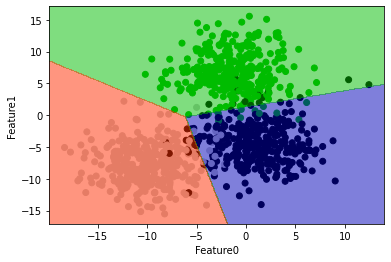

Model Name Decision Tree
100.0


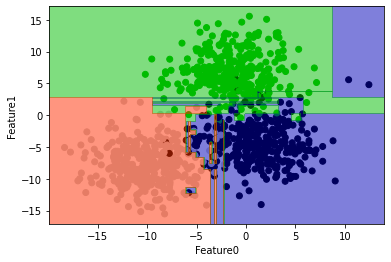

Model Name Random Forest
99.9


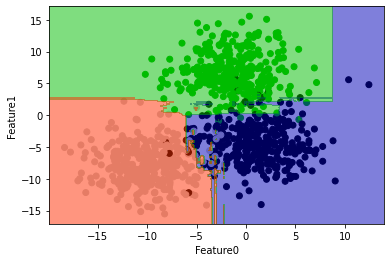

Model Name Gradient Boosting
99.5


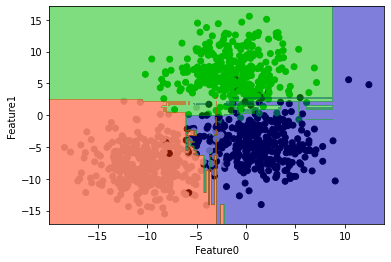

Model Name Support Vector
95.7


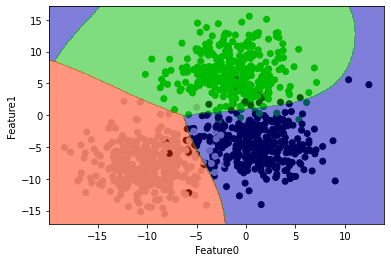

Model Name K Nearest Neighbor
95.7


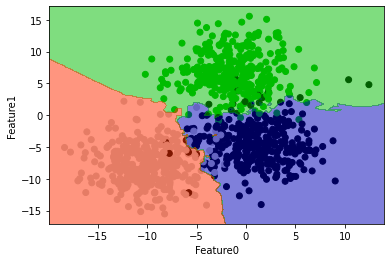

In [21]:
# Plotting
for model_name, model in model_dict.items():
    print('Model Name' , model_name)
    plot_surface(model, X, y)

In [ ]:
#Thanks
#https://www.analyticsvidhya.com/blog/2020/08/plotting-decision-surface-for-classification-machine-learning-algorithms/